In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from data_structs import NewsDataLoader, EvaluationDataLoader, ScorePackage
from utils import model_predict, model_evaluate, model_predict_evaluate

#importing the data
news = pd.read_csv('../dataset_processed/fakeNews_titleStemming_Sampled.csv', index_col=0)
news.reset_index(inplace=True)

from sklearn.model_selection import train_test_split
train_news, test_news = train_test_split(news, test_size=0.2, 
                                         random_state=7)

train_news_predictors_rnn = train_news['title']
train_news_predictors = train_news.drop(columns = ['title', 'label'])
train_news_target = train_news['label']
train_news_loader = NewsDataLoader(train_news_predictors, train_news_target)
train_news_loader_rnn = NewsDataLoader(train_news_predictors_rnn, train_news_target)

test_news_predictors_rnn = test_news['title']
test_news_predictors = test_news.drop(columns = ['title', 'label'])
test_news_target = test_news['label']
test_news_loader = NewsDataLoader(test_news_predictors, test_news_target)
test_news_loader_rnn = NewsDataLoader(test_news_predictors_rnn, test_news_target)

SyntaxError: invalid syntax (3275401031.py, line 9)

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

model_adaBoost = AdaBoostClassifier(n_estimators=100, 
                                    learning_rate=0.1, 
                                    algorithm = 'SAMME')

parms_adaBoost = {
         'n_estimators': [50, 100, 200, 400],
         'learning_rate': [0.001, 0.1, 0.5],
        }
grid_adaBoost = GridSearchCV(
    model_adaBoost, parms_adaBoost, cv = 5, scoring = 'neg_root_mean_squared_error')

grid_adaBoost.fit(train_news_loader.predictors, 
                   train_news_loader.target)
print(grid_adaBoost.best_estimator_)
grid_adaBoost.best_score_

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=100)


-0.31512736071898406

For <knn> evaluated on <train> Dataset:
    - accuracy: 0.9
    - precisionn: 0.988
    - recall: 0.812
    - f1 score: 0.899
For <knn> evaluated on <test> Dataset:
    - accuracy: 0.905
    - precisionn: 0.988
    - recall: 0.825
    - f1 score: 0.905


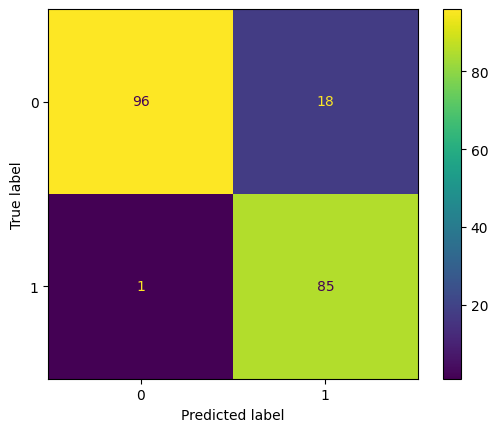

In [3]:
model_adaBoost = grid_adaBoost.best_estimator_

score_package_train_adaBoost, score_package_test_adaBoost = model_predict_evaluate(
        model=model_adaBoost, 
        name_model='adaBoost', 
        train_news_loader=train_news_loader,
        test_news_loader=test_news_loader
)
# train_score_packages['knn'] = score_package_train_knn
# test_score_packages['knn'] = score_package_test_knn